In [24]:
import requests
import zipfile
import io
import pandas as pd
from google.colab import userdata

# --- Get Kaggle credentials from Colab secrets ---
username = userdata.get('KAGGLE_USERNAME')
key = userdata.get('KAGGLE_KEY')

# --- Kaggle API endpoint for the dataset ---
dataset = "manishabhatt22/marketing-campaign-performance-dataset"
url = f"https://www.kaggle.com/api/v1/datasets/download/{dataset}"

# --- Authenticate and download the dataset zip ---
response = requests.get(url, auth=(username, key), stream=True)

if response.status_code == 200:
    print("✅ Download successful, extracting files...")
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall("./kaggle_data")
else:
    print("❌ Failed to download dataset:", response.status_code, response.text)

# --- Load the CSV (auto-detect the first CSV in the extracted folder) ---
import os, glob
csv_files = glob.glob("./kaggle_data/*.csv")

if csv_files:
    df = pd.read_csv(csv_files[0])  # load the first CSV found
    print("Dataset loaded successfully! Shape:", df.shape)
    display(df.head())
else:
    print("No CSV file found in extracted dataset.")


✅ Download successful, extracting files...
Dataset loaded successfully! Shape: (200000, 16)


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [26]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


# Task
Perform data wrangling on the loaded dataset by converting the 'Date' column to datetime, cleaning and converting the 'Acquisition Cost' column to numeric, extracting and converting the numerical duration from the 'Duration' column to numeric (in days), and handling any missing values. Also, display the info of the dataset before and after wrangling.

## Convert 'date' column to datetime

### Subtask:
Convert the 'Date' column to datetime objects for easier time-series analysis.


**Reasoning**:
Convert the 'Date' column to datetime objects and display the DataFrame info to verify the change.



In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  object        
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

## Clean 'acquisition cost' column

### Subtask:
Remove the '$' and ',' characters and convert the 'Acquisition_Cost' column to a numeric data type.


**Reasoning**:
Clean the 'Acquisition_Cost' column by removing '$' and ',' and converting it to numeric, then display the dataframe info.



In [28]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

## Extract numerical duration

### Subtask:
Extract the numerical part from the 'Duration' column and convert it to a numeric data type representing the duration in days.


**Reasoning**:
Extract the numerical part from the 'Duration' column, convert it to integer, and display the info of the dataframe to confirm the changes.



In [29]:
df['Duration'] = df['Duration'].astype(str).str.replace(' days', '', regex=False).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  int64         
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

## Handle potential missing values

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Check for missing values in the DataFrame.



In [30]:
print("Missing values before handling:")
display(df.isnull().sum())

Missing values before handling:


,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


## Summary:

### Data Analysis Key Findings

*   The 'Date' column was successfully converted to a `datetime64[ns]` data type.
*   The 'Acquisition\_Cost' column was cleaned by removing '\$' and ',' characters and converted to a numeric `float64` data type.
*   The numerical duration was extracted from the 'Duration' column, the text ' days' was removed, and the column was converted to an `int64` data type.
*   The dataset was found to have no missing values.

### Insights or Next Steps

*   The dataset is now cleaned and ready for further time-series analysis using the 'Date' column and quantitative analysis using the 'Acquisition\_Cost' and 'Duration' columns.


# Task
Perform K-Means clustering on the loaded dataset after applying Min-Max scaling to the relevant numerical features. Determine the optimal number of clusters using the Elbow Method, apply K-Means clustering, add the cluster labels to the dataset, and analyze and visualize the resulting clusters.

## Select features for clustering

### Subtask:
Choose the numerical columns that are relevant for K-Means clustering.


**Reasoning**:
Select the relevant numerical columns for clustering and store them in a list.



In [31]:
features_for_clustering = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Duration']
print("Selected features for clustering:")
print(features_for_clustering)

Selected features for clustering:
['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Duration']


## Scale the features

### Subtask:
Apply Min-Max scaling to the selected features to ensure they have a similar range.


**Reasoning**:
Apply Min-Max scaling to the selected features and convert the scaled data back into a pandas DataFrame.



In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])
df_scaled = pd.DataFrame(df_scaled, columns=features_for_clustering)
display(df_scaled.head())

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Duration
0,0.214286,0.744933,0.715000,0.451111,0.102444,0.555556,0.333333
1,0.785714,0.437733,0.601667,0.017778,0.724778,0.666667,1.000000
2,0.428571,0.346667,0.863333,0.537778,0.744222,0.000000,0.333333
3,0.714286,0.514933,0.591667,0.130000,0.091111,0.666667,1.000000
4,0.285714,0.763467,0.750000,0.310000,0.355667,0.222222,0.000000


## Determine the optimal number of clusters

### Subtask:
Use a method like the Elbow Method to find the optimal number of clusters for K-Means.


**Reasoning**:
Calculate the inertia for different numbers of clusters (1 to 10) and plot the inertia values against the number of clusters to identify the optimal number of clusters using the Elbow Method.



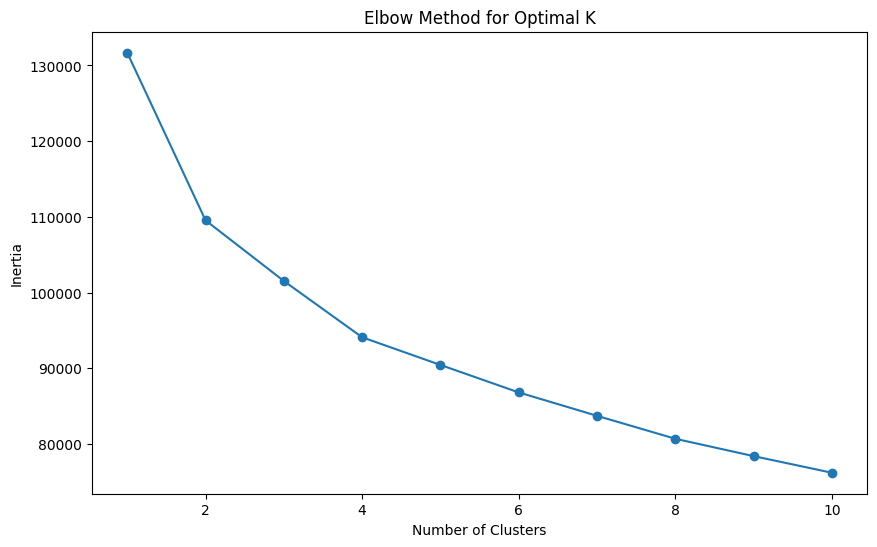

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## Apply k-means clustering

### Subtask:
Perform K-Means clustering on the scaled data using the optimal number of clusters.


**Reasoning**:
Perform K-Means clustering on the scaled data using the optimal number of clusters (3) and store the model.



In [34]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_model.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

## Add cluster labels to the dataframe

### Subtask:
Add a new column to the original DataFrame indicating the cluster assigned to each data point.


**Reasoning**:
Add the cluster labels from the fitted KMeans model to the original DataFrame and display the first few rows to confirm.



In [35]:
df['Cluster'] = kmeans_model.labels_
display(df.head())

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Cluster
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,1
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,0
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,2
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,0
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,2


## Analyze and visualize the clusters

### Subtask:
Explore the characteristics of each cluster and visualize the clustering results.


**Reasoning**:
Group the DataFrame by cluster and calculate the mean of numerical columns to understand cluster characteristics.



In [36]:
cluster_characteristics = df.groupby('Cluster')[features_for_clustering].mean()
display(cluster_characteristics)

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Duration
Cluster,,,,,,,
0,0.080047,12512.073207,5.003177,549.211589,5493.614804,4.863561,53.809210
1,0.079998,12494.862834,4.991720,549.230721,5525.705574,8.414705,28.776177
2,0.080184,12502.959925,5.013037,551.231492,5508.299370,3.271567,21.857361


**Reasoning**:
Visualize the clusters using pairwise scatter plots of key features from the scaled data, colored by cluster.



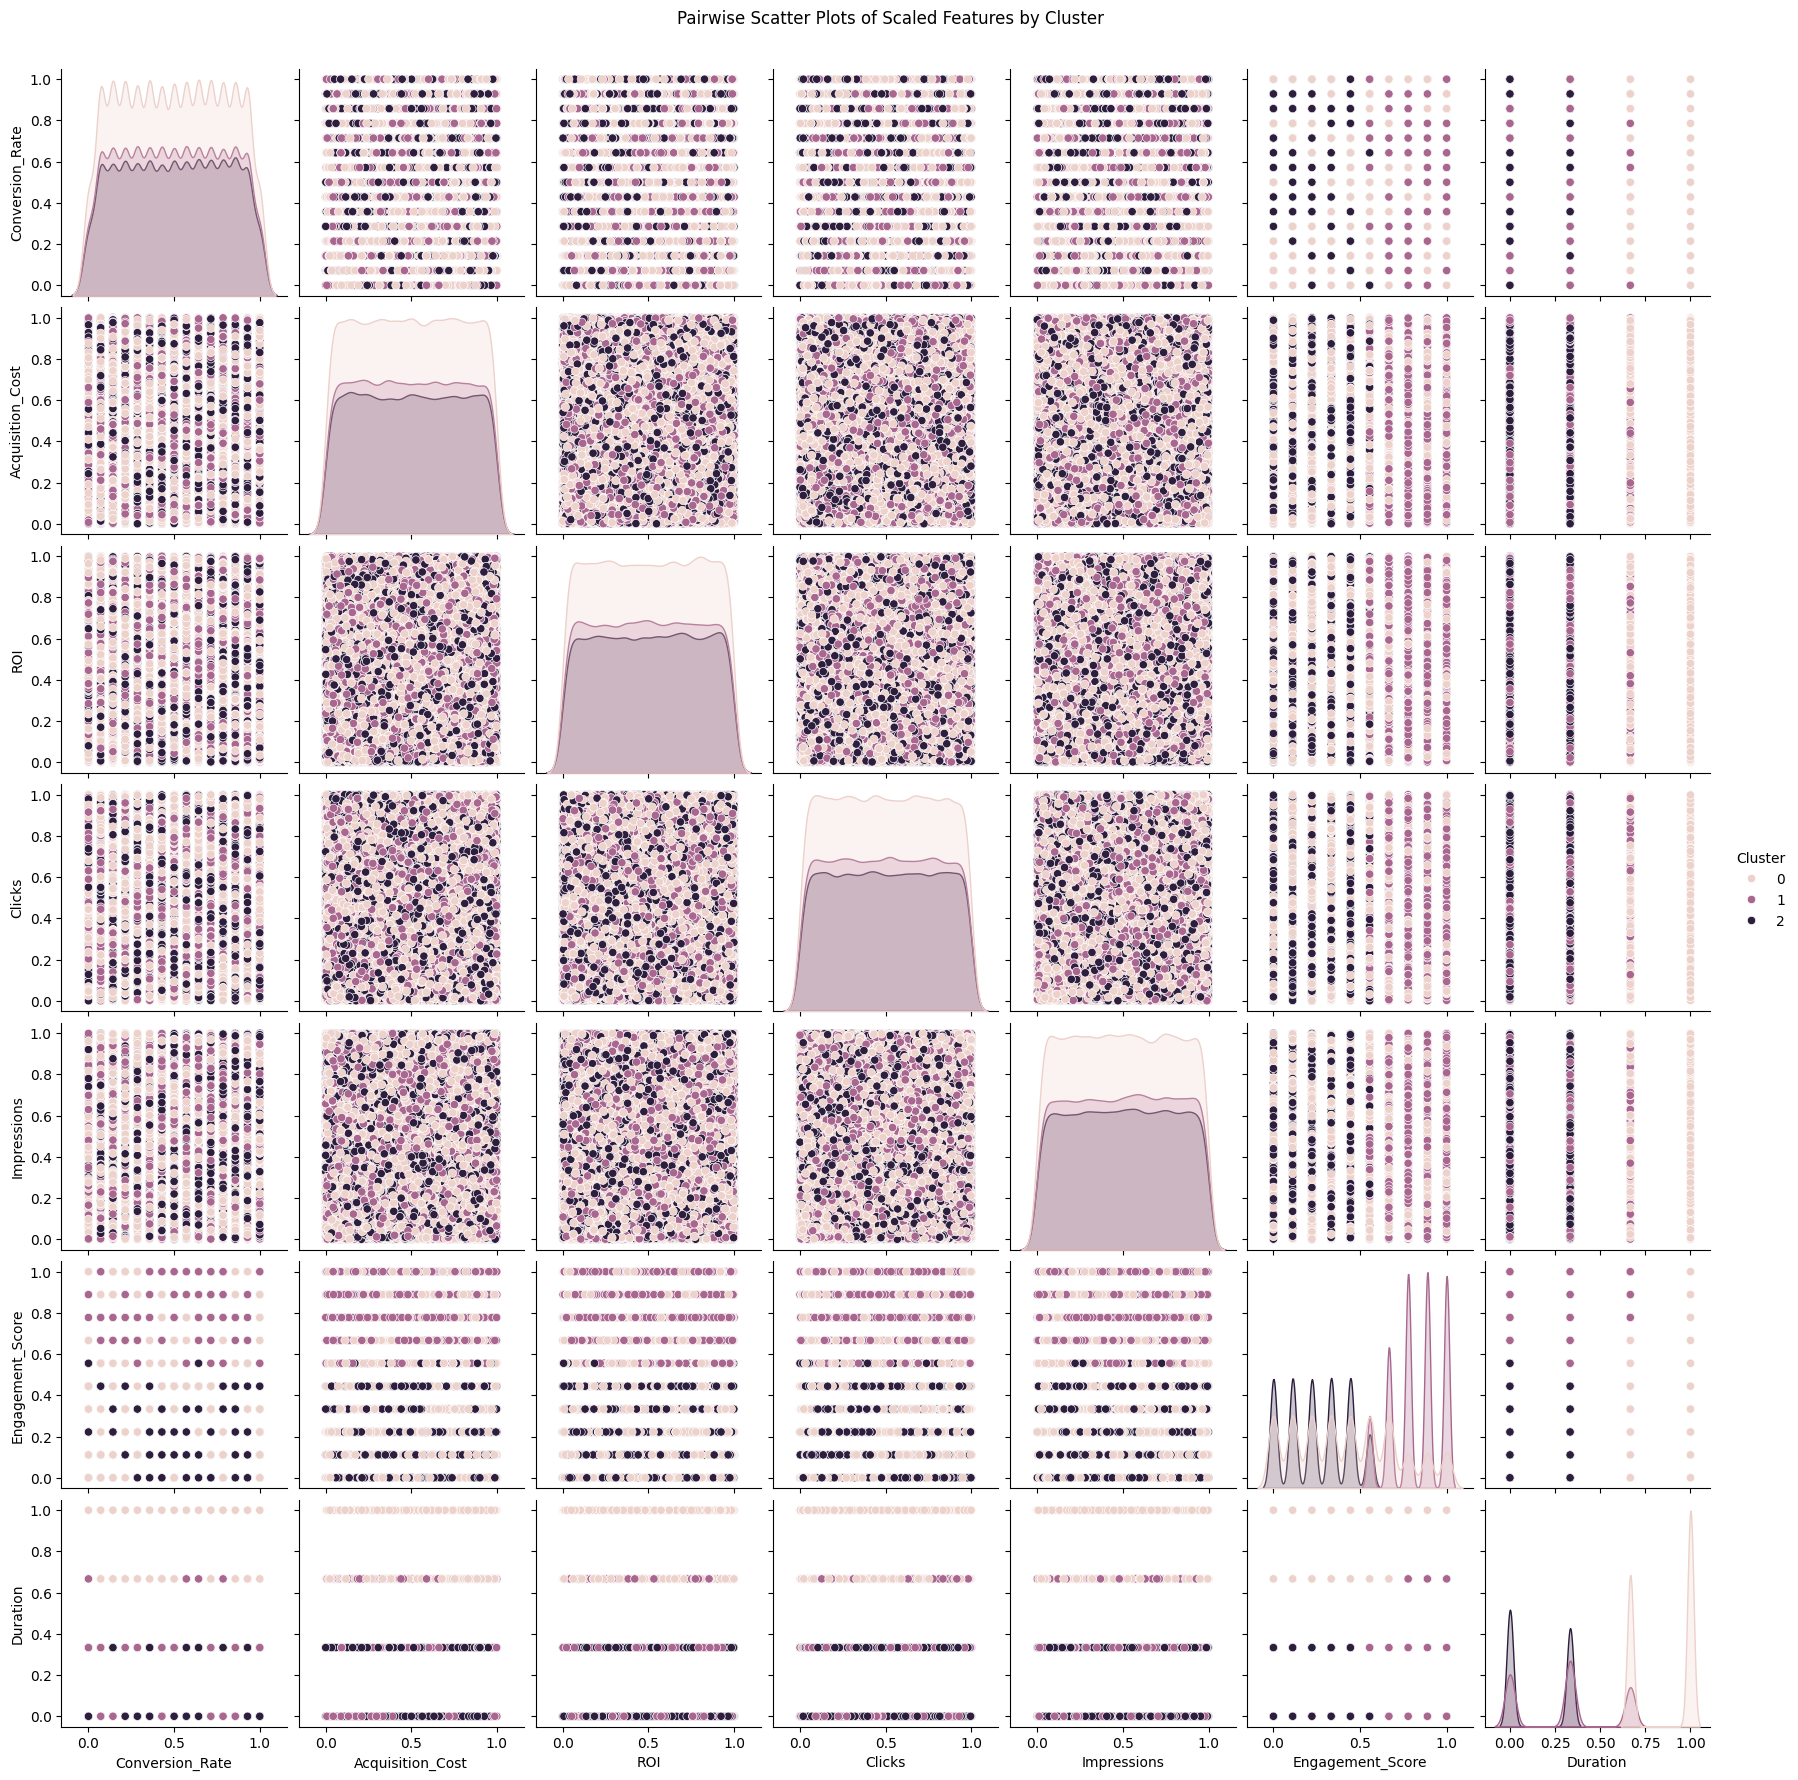

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_scaled.join(df['Cluster']), hue='Cluster', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Scaled Features by Cluster', y=1.02)
plt.show()